## Import libraries

In [1]:
import math
import numpy as np 
import re
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize, RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
import pandas as pd
import pandera as pa
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
%matplotlib inline
from sklearn.svm import LinearSVC
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

## Import Data

In [2]:
Df = pd.read_csv('Amazon_reviews.csv')

In [3]:
Df.head()

,Id,ProductId,Title,Price,UserId,ProfileName,Helpfulness,Score,Time,Summary,Text
0,0,B0009PK7KO,"Caligarius Women's Acheta Pump,Black Calf,6 M",unknown,A12O8IHB65BC1S,Fifi,2/2,4.0,1169769600,Beautiful basic pump...,... but not enough sizes or colors. Fits true...
1,1,B0007MCVQ2,"Clarks Men's Charter Slip-On, Brown Oily Leat...",unknown,A3363OQWT5L3FT,"Marilyn M. Turner ""whitbrook""",0/0,2.0,1168387200,Didn't live up to expectations.,I ordered these shoes to replace the previous...
2,2,B0007MCVQ2,"Clarks Men's Charter Slip-On, Brown Oily Leat...",unknown,A1BHUGKLYW6H7V,P. Lecuyer,0/0,5.0,1127088000,Love my Clarks!,"Like all Clarks, these guys didn't disappoint..."
3,3,B0002M1FPK,"Lightweight Slides, Champagne, 8.5 W",unknown,AITX28WR0L5Y6,"Carol Popick ""Chet""",0/0,5.0,1245715200,ANNIE PEANUT,i HAVE PURCHASED ANNIE PEANUT BEFORE AND THEY...
4,4,B0002M1FPK,"Lightweight Slides, Champagne, 8.5 W",unknown,A1ZPFKIGT4I69S,"KJ Brassy ""KJ Brassy""",0/0,5.0,1168300800,Annie Peanut Shoes,These are my favorite shoes of all time. I fi...


## Check Shape

In [4]:
Df.shape

(389877, 11)

## Check Null Values

In [5]:
Df.isna().sum()

Id             0
ProductId      0
Title          0
Price          0
UserId         0
ProfileName    0
Helpfulness    0
Score          0
Time           0
Summary        0
Text           0
dtype: int64

## Check Info Of Data

In [6]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389877 entries, 0 to 389876
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Id           389877 non-null  int64  
 1   ProductId    389877 non-null  object 
 2   Title        389877 non-null  object 
 3   Price        389877 non-null  object 
 4   UserId       389877 non-null  object 
 5   ProfileName  389877 non-null  object 
 6   Helpfulness  389877 non-null  object 
 7   Score        389877 non-null  float64
 8   Time         389877 non-null  int64  
 9   Summary      389877 non-null  object 
 10  Text         389877 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 32.7+ MB


## Remove Extra Columns

In [7]:
Df.drop(['Id','ProductId', 'Title', 'Price', 'UserId', 'ProfileName', 'Helpfulness', 'Time','Score', 'Summary'],axis=1,inplace=True)

In [8]:
df = Df

## Work on only text column because i will find amazon reviews

In [9]:
df

,Text
0,... but not enough sizes or colors. Fits true...
1,I ordered these shoes to replace the previous...
2,"Like all Clarks, these guys didn't disappoint..."
3,i HAVE PURCHASED ANNIE PEANUT BEFORE AND THEY...
4,These are my favorite shoes of all time. I fi...
...,...
389872,These shoes are a whole size smaller than mar...
389873,i HAVE PURCHASED ANNIE PEANUT BEFORE AND THEY...
389874,These are my favorite shoes of all time. I fi...
389875,Don't usually purchase shoes without trying t...


## I will find the labels for text so i will use Vader sentiment analysis to create labels..

In [10]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASAD\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASAD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
df['Text'] = df['Text'].apply(lambda txt: txt.lower())

In [12]:
stop_words=stopwords.words('english')
df['Text'] = df['Text'].apply(lambda txt: ' '.join([word for word in txt.split() if word not in stop_words]))

In [13]:
df['Text'] = df['Text'].apply(lambda txt: sent_tokenize(txt))

In [14]:
df['Text'] = df['Text'].apply(lambda txt: ' '.join(txt))

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [16]:
text = df['Text']

In [17]:
text

0         ... enough sizes colors. fits true size size 8...
1         ordered shoes replace previous pair ripped apa...
2         like clarks, guys disappoint. fit great look e...
3         purchased annie peanut comfortable shoes own. ...
4         favorite shoes time. first bought denim, wore ...
                                ...                        
389872    shoes whole size smaller marked. wear 7 7 woul...
389873    purchased annie peanut comfortable shoes own. ...
389874    favorite shoes time. first bought denim, wore ...
389875    usually purchase shoes without trying first st...
389876    completely satisfied manner order delivered.th...
Name: Text, Length: 389877, dtype: object

In [18]:
df['labels'] = df['Text'].apply(lambda txt: sid.polarity_scores(txt))

In [19]:
df

,Text,labels
0,... enough sizes colors. fits true size size 8...,"{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'comp..."
1,ordered shoes replace previous pair ripped apa...,"{'neg': 0.077, 'neu': 0.797, 'pos': 0.126, 'co..."
2,"like clarks, guys disappoint. fit great look e...","{'neg': 0.095, 'neu': 0.317, 'pos': 0.588, 'co..."
3,purchased annie peanut comfortable shoes own. ...,"{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'comp..."
4,"favorite shoes time. first bought denim, wore ...","{'neg': 0.053, 'neu': 0.48, 'pos': 0.467, 'com..."
...,...,...
389872,shoes whole size smaller marked. wear 7 7 woul...,"{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp..."
389873,purchased annie peanut comfortable shoes own. ...,"{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'comp..."
389874,"favorite shoes time. first bought denim, wore ...","{'neg': 0.053, 'neu': 0.48, 'pos': 0.467, 'com..."
389875,usually purchase shoes without trying first st...,"{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'comp..."


In [20]:
df['negative'] = df['labels'].apply(lambda txt: txt['neg'])
df['neutral'] = df['labels'].apply(lambda txt: txt['neu'])
df['positive'] = df['labels'].apply(lambda txt: txt['pos'])
df['compound'] = df['labels'].apply(lambda txt: txt['compound'])

In [21]:
df

,Text,labels,negative,neutral,positive,compound
0,... enough sizes colors. fits true size size 8...,"{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'comp...",0.000,0.609,0.391,0.8505
1,ordered shoes replace previous pair ripped apa...,"{'neg': 0.077, 'neu': 0.797, 'pos': 0.126, 'co...",0.077,0.797,0.126,0.2023
2,"like clarks, guys disappoint. fit great look e...","{'neg': 0.095, 'neu': 0.317, 'pos': 0.588, 'co...",0.095,0.317,0.588,0.9186
3,purchased annie peanut comfortable shoes own. ...,"{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'comp...",0.000,0.637,0.363,0.8442
4,"favorite shoes time. first bought denim, wore ...","{'neg': 0.053, 'neu': 0.48, 'pos': 0.467, 'com...",0.053,0.480,0.467,0.9536
...,...,...,...,...,...,...
389872,shoes whole size smaller marked. wear 7 7 woul...,"{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp...",0.000,0.808,0.192,0.6900
389873,purchased annie peanut comfortable shoes own. ...,"{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'comp...",0.000,0.637,0.363,0.8442
389874,"favorite shoes time. first bought denim, wore ...","{'neg': 0.053, 'neu': 0.48, 'pos': 0.467, 'com...",0.053,0.480,0.467,0.9536
389875,usually purchase shoes without trying first st...,"{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'comp...",0.000,0.694,0.306,0.9579


In [22]:
def polarity_score(compound):
    if compound >= 0:
        return "positive"
    elif compound < 0:
        return "negative"

In [23]:
df['new_labels'] = df['compound'].apply(lambda val: polarity_score(val))
df.head(30)

,Text,labels,negative,neutral,positive,compound,new_labels
0,... enough sizes colors. fits true size size 8...,"{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'comp...",0.000,0.609,0.391,0.8505,positive
1,ordered shoes replace previous pair ripped apa...,"{'neg': 0.077, 'neu': 0.797, 'pos': 0.126, 'co...",0.077,0.797,0.126,0.2023,positive
2,"like clarks, guys disappoint. fit great look e...","{'neg': 0.095, 'neu': 0.317, 'pos': 0.588, 'co...",0.095,0.317,0.588,0.9186,positive
3,purchased annie peanut comfortable shoes own. ...,"{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'comp...",0.000,0.637,0.363,0.8442,positive
4,"favorite shoes time. first bought denim, wore ...","{'neg': 0.053, 'neu': 0.48, 'pos': 0.467, 'com...",0.053,0.480,0.467,0.9536,positive
5,usually purchase shoes without trying first st...,"{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'comp...",0.000,0.694,0.306,0.9579,positive
6,completely satisfied manner order delivered.th...,"{'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'comp...",0.000,0.527,0.473,0.8016,positive
7,boots well made. husband wears work loves them...,"{'neg': 0.0, 'neu': 0.603, 'pos': 0.397, 'comp...",0.000,0.603,0.397,0.8807,positive
8,"shoe good sprinter, really someone runs long d...","{'neg': 0.031, 'neu': 0.841, 'pos': 0.128, 'co...",0.031,0.841,0.128,0.6597,positive
9,spikes great jumping!but sure order half size ...,"{'neg': 0.0, 'neu': 0.589, 'pos': 0.411, 'comp...",0.000,0.589,0.411,0.9111,positive


## Check value counts

In [24]:
df['new_labels'].value_counts()

positive    360547
negative     29330
Name: new_labels, dtype: int64

## Check null values 

In [25]:
df.isna().sum()

Text          0
labels        0
negative      0
neutral       0
positive      0
compound      0
new_labels    0
dtype: int64

## Drop all the columns except Text and new_labels

In [26]:
df.drop(['labels', 'negative', 'neutral', 'positive', 'compound'], axis=1, inplace=True)

In [27]:
#df.drop(['Summary'], axis=1, inplace=True)

In [28]:
df

,Text,new_labels
0,... enough sizes colors. fits true size size 8...,positive
1,ordered shoes replace previous pair ripped apa...,positive
2,"like clarks, guys disappoint. fit great look e...",positive
3,purchased annie peanut comfortable shoes own. ...,positive
4,"favorite shoes time. first bought denim, wore ...",positive
...,...,...
389872,shoes whole size smaller marked. wear 7 7 woul...,positive
389873,purchased annie peanut comfortable shoes own. ...,positive
389874,"favorite shoes time. first bought denim, wore ...",positive
389875,usually purchase shoes without trying first st...,positive


## Create dependent and independent variables

In [29]:
X = df.drop('new_labels', axis=1)
X

,Text
0,... enough sizes colors. fits true size size 8...
1,ordered shoes replace previous pair ripped apa...
2,"like clarks, guys disappoint. fit great look e..."
3,purchased annie peanut comfortable shoes own. ...
4,"favorite shoes time. first bought denim, wore ..."
...,...
389872,shoes whole size smaller marked. wear 7 7 woul...
389873,purchased annie peanut comfortable shoes own. ...
389874,"favorite shoes time. first bought denim, wore ..."
389875,usually purchase shoes without trying first st...


In [30]:
y=df['new_labels']
y

0         positive
1         positive
2         positive
3         positive
4         positive
            ...   
389872    positive
389873    positive
389874    positive
389875    positive
389876    positive
Name: new_labels, Length: 389877, dtype: object

## Count values of y

<AxesSubplot:xlabel='new_labels', ylabel='count'>

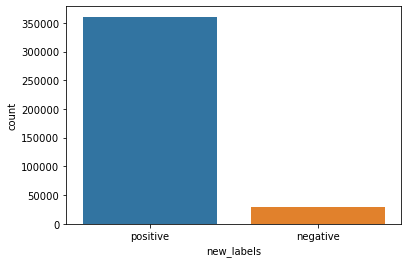

In [31]:
sns.countplot(x = y)

## Data totally imbalance so first balance the data by over_sampling

In [32]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(sampling_strategy=1)
x_res, y_res = os.fit_resample(X,y)

<AxesSubplot:xlabel='new_labels', ylabel='count'>

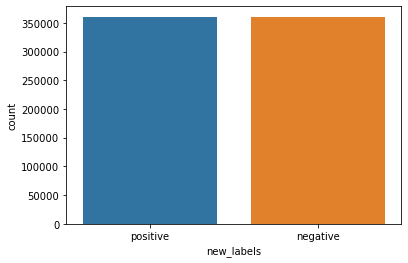

In [33]:
sns.countplot(x = y_res)

In [34]:
y_res.value_counts()

positive    360547
negative    360547
Name: new_labels, dtype: int64

In [35]:
y_res

0         positive
1         positive
2         positive
3         positive
4         positive
            ...   
721089    negative
721090    negative
721091    negative
721092    negative
721093    negative
Name: new_labels, Length: 721094, dtype: object

In [36]:
x_res

,Text
0,... enough sizes colors. fits true size size 8...
1,ordered shoes replace previous pair ripped apa...
2,"like clarks, guys disappoint. fit great look e..."
3,purchased annie peanut comfortable shoes own. ...
4,"favorite shoes time. first bought denim, wore ..."
...,...
721089,found hard reach anyone customer service retur...
721090,worried shoes would ill fit. arrived found wor...
721091,comfy sandals ever. i've wanted pair long time...
721092,years i've typically bought much higher end hi...


## Use nlp to convert text to vectors

## Tokenize the words in the x_res variable and Text column

In [37]:
from nltk.tokenize import word_tokenize
X = x_res['Text'].apply(lambda x: word_tokenize(x))

In [38]:
X.head()

0    [..., enough, sizes, colors, ., fits, true, si...
1    [ordered, shoes, replace, previous, pair, ripp...
2    [like, clarks, ,, guys, disappoint, ., fit, gr...
3    [purchased, annie, peanut, comfortable, shoes,...
4    [favorite, shoes, time, ., first, bought, deni...
Name: Text, dtype: object

## Remove non alphabet from text

In [39]:
X = X.apply(lambda x: [word for word in x if word.isalpha()])

In [40]:
X

0         [enough, sizes, colors, fits, true, size, size...
1         [ordered, shoes, replace, previous, pair, ripp...
2         [like, clarks, guys, disappoint, fit, great, l...
3         [purchased, annie, peanut, comfortable, shoes,...
4         [favorite, shoes, time, first, bought, denim, ...
                                ...                        
721089    [found, hard, reach, anyone, customer, service...
721090    [worried, shoes, would, ill, fit, arrived, fou...
721091    [comfy, sandals, ever, i, wanted, pair, long, ...
721092    [years, i, typically, bought, much, higher, en...
721093    [amazon, advertised, free, shipping, took, bai...
Name: Text, Length: 721094, dtype: object

## Lemmatize words

In [41]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASAD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
X = X.apply(lambda x: [WordNetLemmatizer().lemmatize(word) for word in x])

In [43]:
X

0         [enough, size, color, fit, true, size, size, s...
1         [ordered, shoe, replace, previous, pair, rippe...
2         [like, clark, guy, disappoint, fit, great, loo...
3         [purchased, annie, peanut, comfortable, shoe, ...
4         [favorite, shoe, time, first, bought, denim, w...
                                ...                        
721089    [found, hard, reach, anyone, customer, service...
721090    [worried, shoe, would, ill, fit, arrived, foun...
721091    [comfy, sandal, ever, i, wanted, pair, long, t...
721092    [year, i, typically, bought, much, higher, end...
721093    [amazon, advertised, free, shipping, took, bai...
Name: Text, Length: 721094, dtype: object

## Use tfidf model to convert text to vectors

In [44]:
Tfidf_vect = TfidfVectorizer()
X = Tfidf_vect.fit_transform(X.astype(str))

In [45]:
Tfidf_vect

TfidfVectorizer()

In [46]:
print(X)

  (0, 29580)	0.25731626611842956
  (0, 24563)	0.30165576700678903
  (0, 15066)	0.21010702570347775
  (0, 33879)	0.2546545318445928
  (0, 32587)	0.5646089144337971
  (0, 17596)	0.1947554208762196
  (0, 21077)	0.15405177865719788
  (0, 29491)	0.29187812911933253
  (0, 6520)	0.2100999423884321
  (0, 30026)	0.1767680959063852
  (0, 34068)	0.18709678383108463
  (0, 12477)	0.12511839799891486
  (0, 6119)	0.14125273723278728
  (0, 29283)	0.30268769404203544
  (0, 10807)	0.17475585866874677
  (1, 3257)	0.14516136297139717
  (1, 20682)	0.12282677999434165
  (1, 15337)	0.22264231192402834
  (1, 28262)	0.16918133873044414
  (1, 30403)	0.22598768777706763
  (1, 29164)	0.19179106908361782
  (1, 3932)	0.09894667613270551
  (1, 29201)	0.13038628309245145
  (1, 30135)	0.16137515616296413
  (1, 20454)	0.13564486758730435
  :	:
  (721093, 25789)	0.2621980114041665
  (721093, 18268)	0.2606713371189901
  (721093, 2636)	0.25819941408859387
  (721093, 16716)	0.2586290775109092
  (721093, 37176)	0.2343045661

In [47]:
print(X[:3])

  (0, 29580)	0.25731626611842956
  (0, 24563)	0.30165576700678903
  (0, 15066)	0.21010702570347775
  (0, 33879)	0.2546545318445928
  (0, 32587)	0.5646089144337971
  (0, 17596)	0.1947554208762196
  (0, 21077)	0.15405177865719788
  (0, 29491)	0.29187812911933253
  (0, 6520)	0.2100999423884321
  (0, 30026)	0.1767680959063852
  (0, 34068)	0.18709678383108463
  (0, 12477)	0.12511839799891486
  (0, 6119)	0.14125273723278728
  (0, 29283)	0.30268769404203544
  (0, 10807)	0.17475585866874677
  (1, 3257)	0.14516136297139717
  (1, 20682)	0.12282677999434165
  (1, 15337)	0.22264231192402834
  (1, 28262)	0.16918133873044414
  (1, 30403)	0.22598768777706763
  (1, 29164)	0.19179106908361782
  (1, 3932)	0.09894667613270551
  (1, 29201)	0.13038628309245145
  (1, 30135)	0.16137515616296413
  (1, 20454)	0.13564486758730435
  :	:
  (1, 27608)	0.16266569155169194
  (1, 5719)	0.19950859846570926
  (1, 30032)	0.1375337927941896
  (1, 1642)	0.17202979670155708
  (1, 27127)	0.47947180066252804
  (1, 22856)	0.2

## Train test split

## Train model on 75% data

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y_res, test_size=0.25, random_state=25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(540820, 37455) (540820,)
(180274, 37455) (180274,)


In [49]:
print(X_train)

  (0, 36626)	0.2822079180571533
  (0, 10339)	0.27294065256014727
  (0, 31243)	0.20406594682412899
  (0, 20937)	0.1601613605778569
  (0, 18764)	0.1889936445861012
  (0, 22154)	0.2719231311741537
  (0, 1386)	0.19061336220127703
  (0, 37178)	0.10732607799293112
  (0, 2950)	0.22542515441488115
  (0, 35018)	0.19832273409311643
  (0, 21556)	0.17621764377713534
  (0, 26077)	0.21039745267547091
  (0, 33533)	0.1657746229838114
  (0, 36103)	0.09739451468136757
  (0, 36255)	0.12544061282539634
  (0, 3793)	0.35170563131008714
  (0, 36529)	0.17411767485550939
  (0, 4587)	0.15725934876669304
  (0, 12874)	0.09713459316212356
  (0, 25308)	0.1311644041101165
  (0, 36504)	0.1489908606426373
  (0, 32162)	0.1648717879574729
  (0, 36903)	0.12527432437447178
  (0, 33243)	0.22237063784564567
  (0, 1124)	0.13418787109223518
  :	:
  (540818, 28777)	0.11713800594864769
  (540819, 27766)	0.33173006367466445
  (540819, 29015)	0.3474559980049068
  (540819, 32001)	0.3040898838483714
  (540819, 516)	0.25999845497809

## Train at least 4 different machine learning algorithms

In [50]:
#Decision Tree Classifier.
dt_clf=DecisionTreeClassifier(random_state=25)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=25)

In [51]:
dt_pred = dt_clf.predict(X_test)

In [52]:
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))
Decision_Tree_Accuracy = round(accuracy_score(y_test, dt_pred)*100)
Decision_Tree_Accuracy

[[90330     0]
 [  829 89115]]
              precision    recall  f1-score   support

    negative       0.99      1.00      1.00     90330
    positive       1.00      0.99      1.00     89944

    accuracy                           1.00    180274
   macro avg       1.00      1.00      1.00    180274
weighted avg       1.00      1.00      1.00    180274



100

In [53]:
 clf = RandomForestClassifier(max_depth=2, random_state=0)

In [54]:
clf.fit(X_train, y_train)
RandomForestClassifier(...)
pred = clf.predict(X_test)
pred

array(['negative', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [55]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
Random_Forest_Accuracy = round(accuracy_score(y_test, pred)*100)
print(Random_Forest_Accuracy)

[[73143 17187]
 [18424 71520]]
              precision    recall  f1-score   support

    negative       0.80      0.81      0.80     90330
    positive       0.81      0.80      0.80     89944

    accuracy                           0.80    180274
   macro avg       0.80      0.80      0.80    180274
weighted avg       0.80      0.80      0.80    180274

80


In [56]:
#Logistic regression.
lr_model = LogisticRegression(random_state=25)

In [57]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=25)

In [58]:
pred = lr_model.predict(X_test)

In [59]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
Logistic_regression_Accuracy = round(accuracy_score(y_test, pred)*100)
print(Logistic_regression_Accuracy)

[[89337   993]
 [ 2135 87809]]
              precision    recall  f1-score   support

    negative       0.98      0.99      0.98     90330
    positive       0.99      0.98      0.98     89944

    accuracy                           0.98    180274
   macro avg       0.98      0.98      0.98    180274
weighted avg       0.98      0.98      0.98    180274

98


In [60]:
 from sklearn.naive_bayes import MultinomialNB

In [61]:
clf = MultinomialNB()

In [62]:
clf.fit(X_train, y_train)

MultinomialNB()

In [63]:
pred = clf.predict(X_test)

In [64]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
Multinomial_naive_bayes = round(accuracy_score(y_test, pred)*100)
print(Multinomial_naive_bayes)

[[83434  6896]
 [ 4931 85013]]
              precision    recall  f1-score   support

    negative       0.94      0.92      0.93     90330
    positive       0.92      0.95      0.93     89944

    accuracy                           0.93    180274
   macro avg       0.93      0.93      0.93    180274
weighted avg       0.93      0.93      0.93    180274

93


## Create dataframe of all models names and also show its accuracies

In [65]:
data = {'Models': ['Decision Tree Classifier', 'Random Forest Accuracy', 'Logistic regression', 'Multinomial naive bayes'], 'Accuracy of Models': [Decision_Tree_Accuracy, Random_Forest_Accuracy, Logistic_regression_Accuracy,  Multinomial_naive_bayes]}
dt = pd.DataFrame(data)
display(dt)

,Models,Accuracy of Models
0,Decision Tree Classifier,100
1,Random Forest Accuracy,80
2,Logistic regression,98
3,Multinomial naive bayes,93


## Show all models results on bar plot

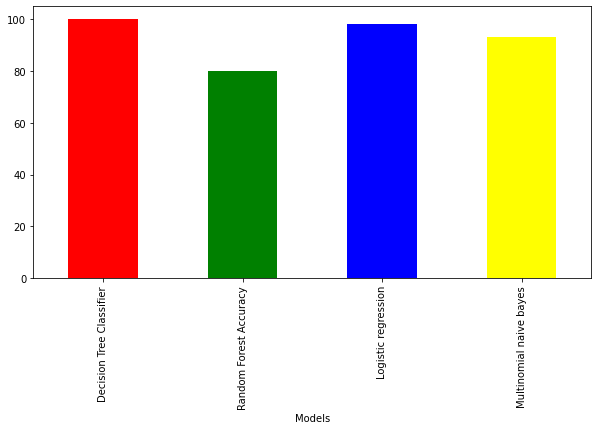

In [66]:
#Create barplot on the above dataframe.
dt.plot(x='Models', y='Accuracy of Models', kind='bar', color = ['red', 'green', 'blue', 'yellow'], figsize = (10, 5),legend=None)
plt.show()